# Assignment Week 6

### Addition of Week 7 Below

### Addition of Week 8 Below

#### Loading Packages and Data

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import yellowbrick
from yellowbrick.features import Rank2D
import numpy as np
from yellowbrick.features import ParallelCoordinates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [5]:
titanic = pd.read_csv(r"C:\Users\datre\OneDrive\Documents\Graduate School\Winter '20\train.csv")

In [6]:
print("The dimension of the table is: ", titanic.shape)

The dimension of the table is:  (891, 12)


In [7]:
print(titanic.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


#### Details of Data

##### Variables

In [8]:
print("Describe Data")
print(titanic.describe())
print("Summarized Data")
print(titanic.describe(include=['O']))

Describe Data
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Summarized Data
                              Name   Sex    Ticket 

#### Visualizing Data

##### Histograms

In [9]:
plt.rcParams['figure.figsize'] = (20, 10)

In [11]:
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

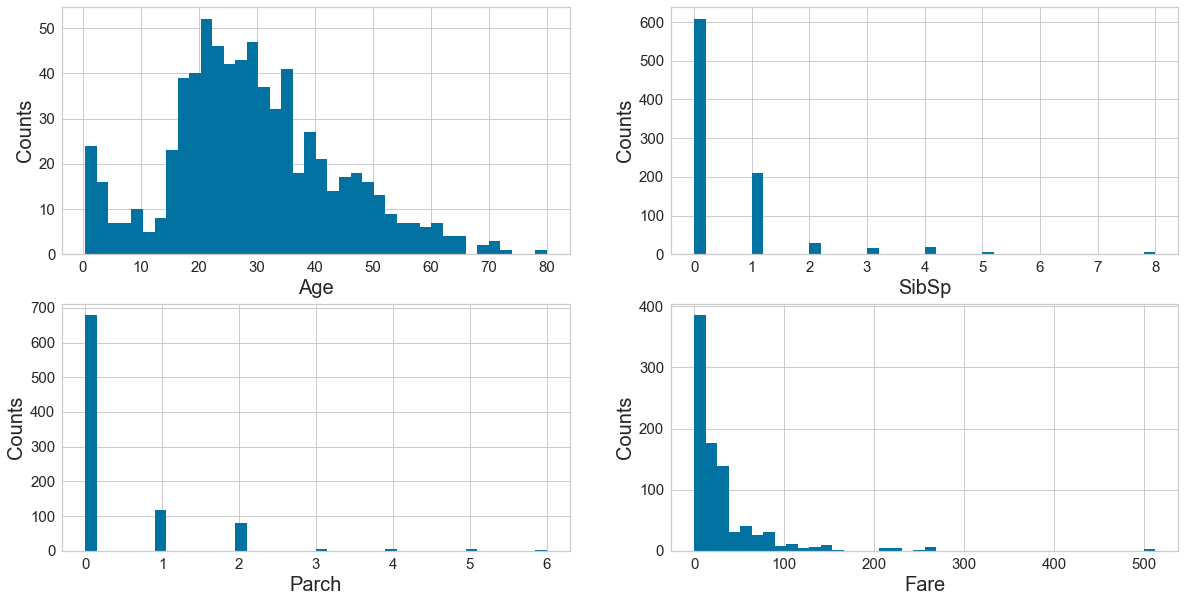

In [19]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(titanic[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

##### Barcharts

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

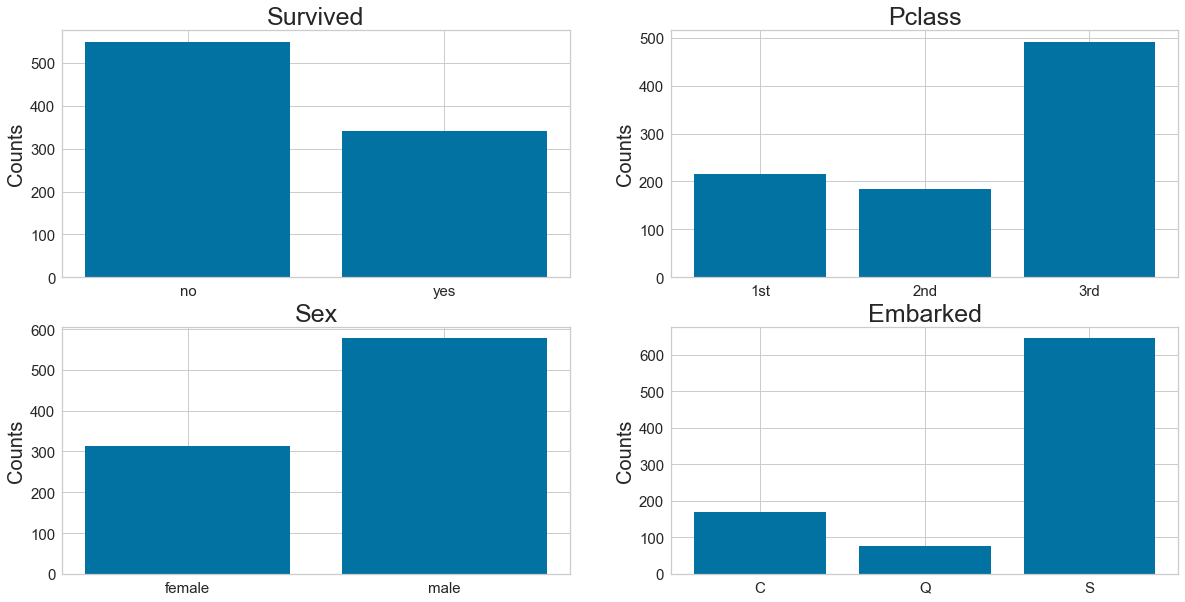

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Plot One
X_Survived = titanic.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = titanic.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# Plot Two
X_Pclass = titanic.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = titanic.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# Plot Three
X_Sex = titanic.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = titanic.groupby('Sex').size().reset_index(name='Counts')['Counts']
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# Plot Four
X_Embarked = titanic.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = titanic.groupby('Embarked').size().reset_index(name='Counts')['Counts']
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

plt.show()

##### Pearson Ranking

In [22]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

In [97]:
titanic3 = titanic.copy()
set3 = titanic3[["Age", "SibSp", "Parch", "Fare"]]
val = set3.values

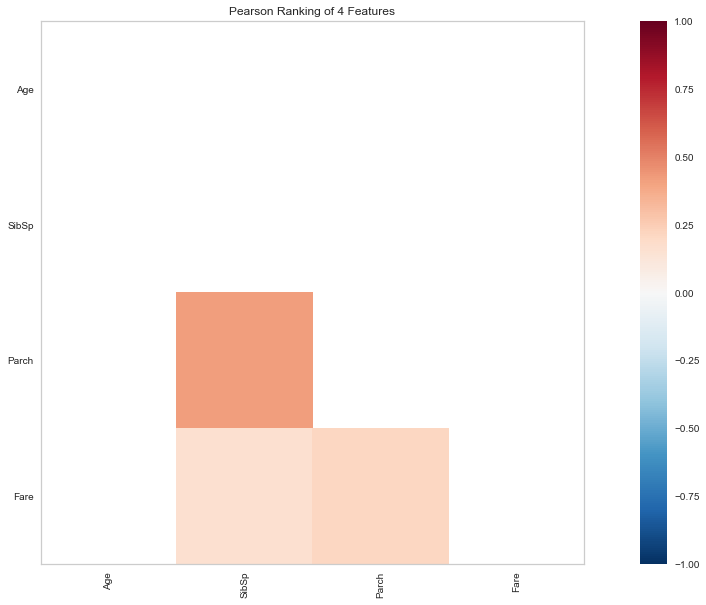

In [118]:
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(val)                # Fit the data to the visualizer
visualizer.transform(val)             # Transform the data
visualizer.show(outpath="d://pcoords1.png") # Draw/show/poof the data
plt.show()

##### Comparing Variables

In [65]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

In [66]:
from yellowbrick.style import set_palette
set_palette('sns_bright')

In [67]:
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

In [68]:
tnc_norm = titanic.copy()
# normalize data to 0-1 range
for feature in num_features:
    tnc_norm[feature] = (titanic[feature] - titanic[feature].min(skipna=True)) / (titanic[feature].max(skipna=True) - titanic[feature].min(skipna=True))

In [114]:
set4 = tnc_norm[["Age", "SibSp", "Parch", "Fare"]]
val2 = set4.values
val2

array([[0.27117366, 0.125     , 0.        , 0.01415106],
       [0.4722292 , 0.125     , 0.        , 0.13913574],
       [0.32143755, 0.        , 0.        , 0.01546857],
       ...,
       [       nan, 0.125     , 0.33333333, 0.04577135],
       [0.32143755, 0.        , 0.        , 0.0585561 ],
       [0.39683338, 0.        , 0.        , 0.01512699]])

In [115]:
X = val2
y = titanic["Survived"].values

In [120]:
visualizer = ParallelCoordinates(classes=classes, features=num_features)

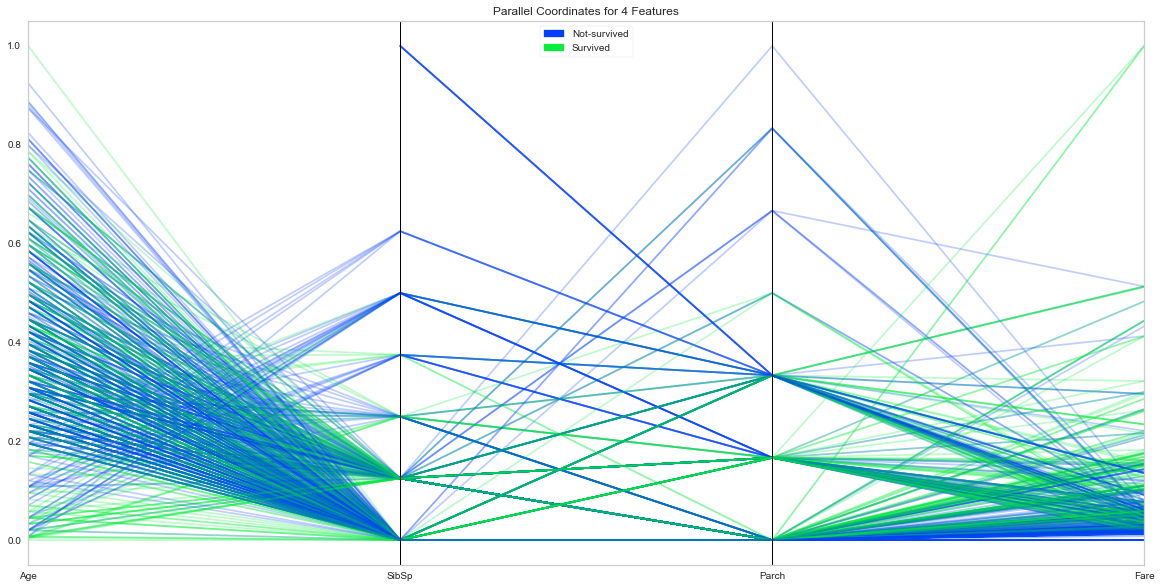

In [121]:
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.show(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show()

##### Stacked Bar Charts

In [79]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

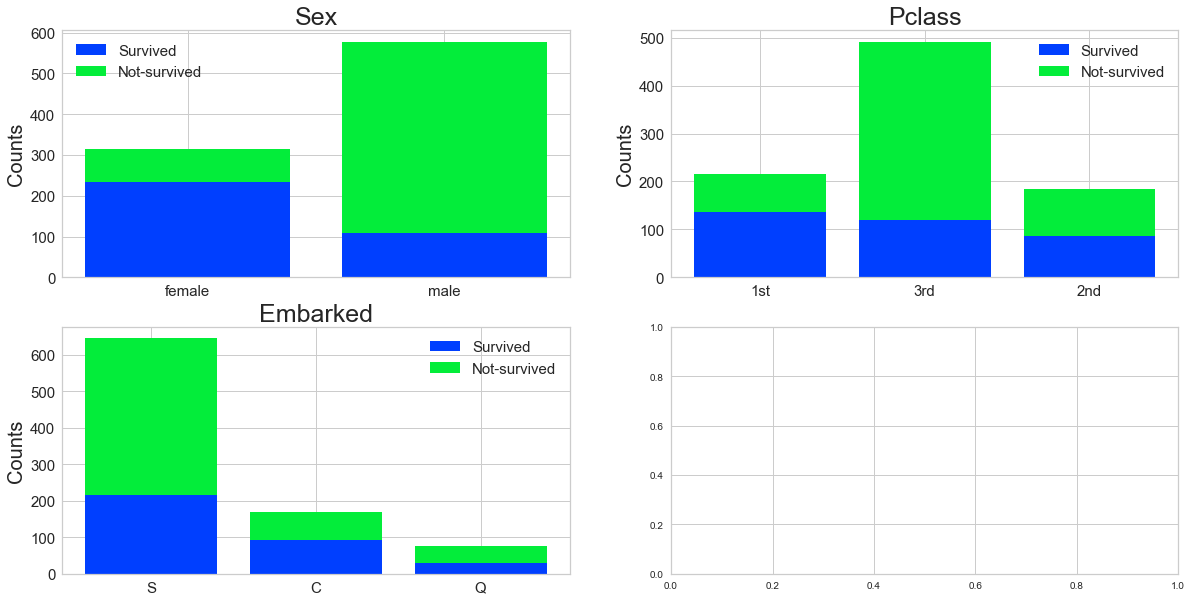

In [81]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Plot One
Sex_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==1]['Sex'].value_counts()
Sex_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# Plot Two
Pclass_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[titanic['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[titanic['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# Plot Three
Embarked_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
plt.show()


# Beginning of Week 7 Instructions

#### Fill Missing Values and Feature Elimination

##### Missing Age Data

In [123]:
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(titanic['Age'])
print(titanic["Age"].describe())

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


##### Missing Embarked Data

In [125]:
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(titanic['Embarked'])
print(titanic["Embarked"].describe())

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


#### Log Transforming

In [127]:
def log_transformation(data):
    return data.apply(np.log1p)

titanic['Fare_log1p'] = log_transformation(titanic['Fare'])

In [128]:
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Fare_log1p  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    2.962246  
std      0.806057   49.693429    0.969048  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    2.187218  
50%      0.000000   14.454200    2.737881  
75%      0.000000   31.000000    3.465736  
max      6.000000

#### Adjusting Skewed Data

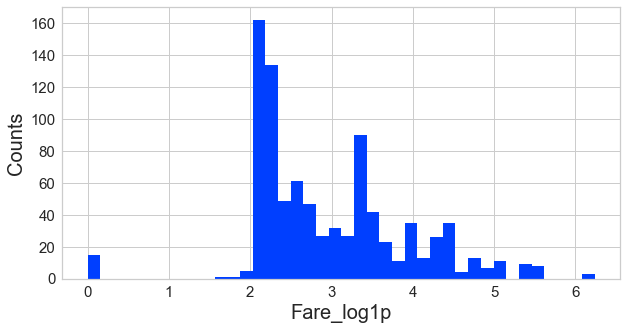

In [129]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(titanic['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

#### Converting Categorical Data to Numerical Data

In [130]:
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = titanic[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})

In [131]:
data_cat_dummies = pd.get_dummies(data_cat)

In [132]:
print(data_cat_dummies.head(8))

   Pclass_1st  Pclass_2nd  Pclass_3rd  Sex_female  Sex_male  Embarked_C  \
0           0           0           1           0         1           0   
1           1           0           0           1         0           1   
2           0           0           1           1         0           0   
3           1           0           0           1         0           0   
4           0           0           1           0         1           0   
5           0           0           1           0         1           0   
6           1           0           0           0         1           0   
7           0           0           1           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
5           1           0  
6           0           1  
7           0           1  


# Beginning of Week 8 Assignment

#### Creating testing and training sets

In [158]:
# Combining all features together
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([titanic[features_model], data_cat_dummies], axis=1)

In [159]:
# Creating target dataset
data_model_y = titanic["Survived"]

In [160]:
# Splitting into test and train sets
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  623
No. of samples in validation set: 268


In [161]:
# Stating how many survived and not survived in each set
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())



No. of survived and not-survived in the training set:
0    373
1    250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set:
0    176
1     92
Name: Survived, dtype: int64


#### Perform Logistic Regression Model

In [162]:
# Calling logistic regression model
model = LogisticRegression()

C:\Users\datre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


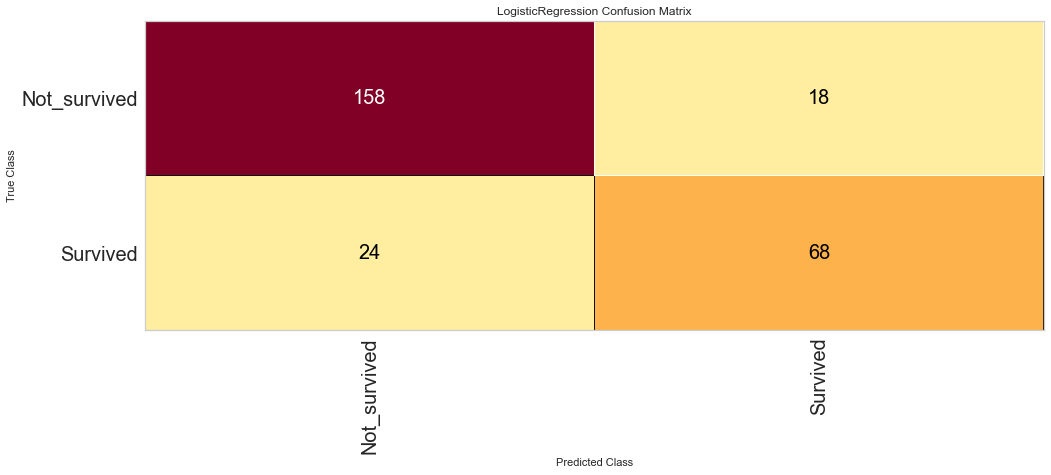

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [163]:
# Taxing model with confushion matrix
classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# Fitting the logistic regression model
cm.fit(X_train, y_train)

# Entering test data into mix
cm.score(X_val, y_val)

# Changing font size
for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

##### Finding Precision, Recall and F1

C:\Users\datre\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


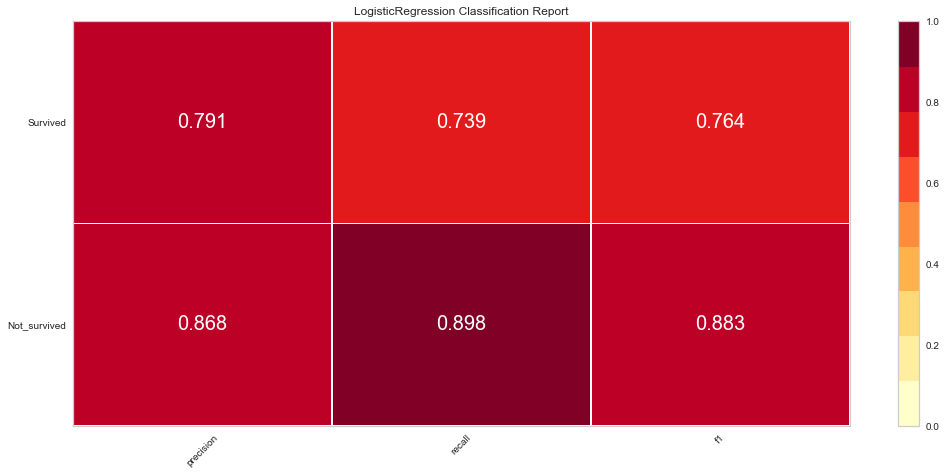

In [164]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

visualizer = ClassificationReport(model, classes=classes)

# Fitting training data to visualizer
visualizer.fit(X_train, y_train)
# Entering test data to model
visualizer.score(X_val, y_val) 

g = visualizer.poof()


##### ROC and AUC

C:\Users\datre\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


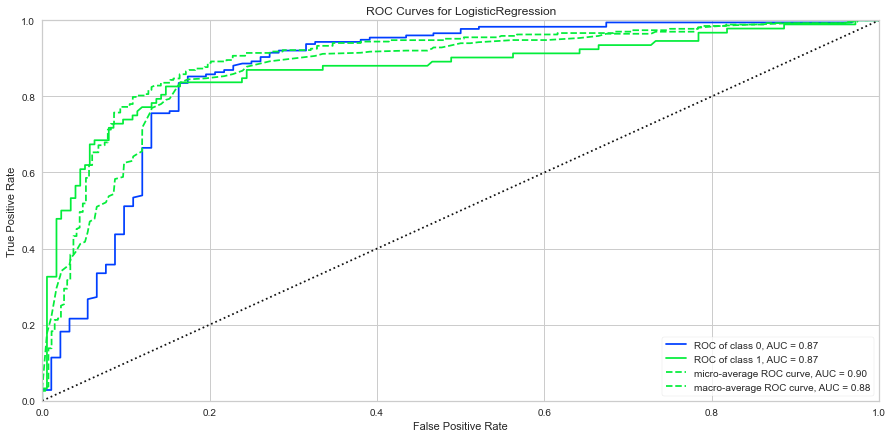

In [165]:
visualizer = ROCAUC(model)

# Fitting training data to visualizer
visualizer.fit(X_train, y_train)
# Entering test data to model
visualizer.score(X_val, y_val) 

g = visualizer.poof()